# Logistic 回歸模型 (性別資料集)

In [1]:
gender_size <- read.csv("../data_files/gender_size.csv", stringsAsFactors = TRUE)

In [2]:
# 建立logistic迴歸模型 (用全部的參數)
LR0 <- glm(formula=Gender ~ ., family=binomial(link="logit"), data=gender_size)
summary(LR0)

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Call:
glm(formula = Gender ~ ., family = binomial(link = "logit"), 
    data = gender_size)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.06729  -0.02516   0.00014   0.00435   1.79134  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)   
(Intercept) -137.44792   42.55968  -3.230  0.00124 **
Height         0.42164    0.15681   2.689  0.00717 **
Weight        -0.09541    0.10902  -0.875  0.38152   
Waist          2.62804    0.92506   2.841  0.00450 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 187.672  on 140  degrees of freedom
Residual deviance:  23.917  on 137  degrees of freedom
AIC: 31.917

Number of Fisher Scoring iterations: 10


          Actual
Prediction female male
    female     51    4
    male        3   83

Accuracy: 95.03546 % 


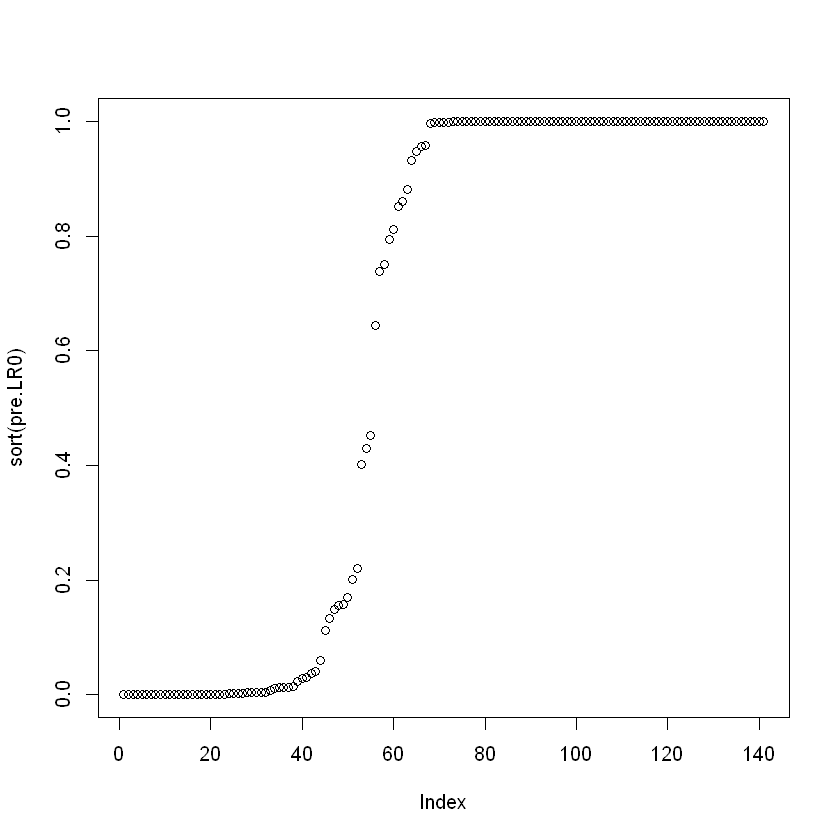

In [3]:
# 預測原資料的結果
pre.LR0 <- predict.glm(LR0, type="response", newdata=gender_size)
result0 <- ifelse (round(pre.LR0)>=0.5, "male", "female")

table(result0, gender_size[,4], dnn=c("Prediction","Actual"))
cat("Accuracy:", sum(gender_size[,4]==result0)/ nrow(gender_size)*100, "% \n")
plot(sort(pre.LR0))

In [4]:
# 預測新資料
x1 <- list(Height= 170, Weight=65, Waist=32)
x2 <- list(Height= 155, Weight=58, Waist=28)

predict.LR0 <- function (data){
    pre.data <- predict.glm(LR0, type="response", newdata=data)
    result.data <- ifelse (round(pre.data)>=0.5, "male", "female")
    pre.data <- ifelse (round(pre.data)>=0.5, pre.data, 1-pre.data)
    cat(result.data, ", probability:", pre.data, "\n\n")
    }

cat("Data x1 predict by LR0: ")
predict.LR0(x1)
cat("Data x2 predict by LR0: ")
predict.LR0(x2)

Data x1 predict by LR0: male , probability: 0.9999946 

Data x2 predict by LR0: female , probability: 0.982749 



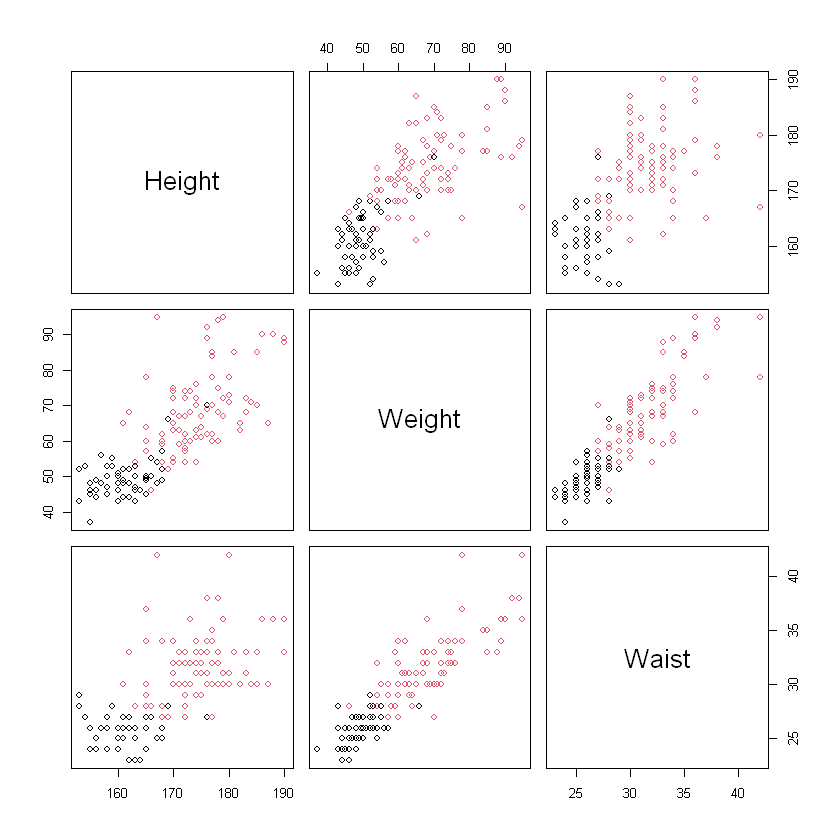

In [5]:
# 由於原資料幾乎線性可分，故觀看原資料有無限性不可分的參數
plot(gender_size[,-4], col=gender_size[,4])

In [6]:
# Height/Weight資料點較混雜,故使用其作為logistic迴歸模型的參數
LR1 <- glm(formula=Gender~ Height+Weight, family=binomial(link="logit"), data=gender_size) #警告消失
summary(LR1)


Call:
glm(formula = Gender ~ Height + Weight, family = binomial(link = "logit"), 
    data = gender_size)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.5061  -0.2126   0.0190   0.1611   2.1341  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -60.61573   14.87762  -4.074 4.62e-05 ***
Height        0.28953    0.09272   3.123 0.001793 ** 
Weight        0.22574    0.06623   3.408 0.000654 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 187.672  on 140  degrees of freedom
Residual deviance:  52.841  on 138  degrees of freedom
AIC: 58.841

Number of Fisher Scoring iterations: 7


          Actual
Prediction female male
    female     51    2
    male        3   85

Accuracy: 96.4539 % 


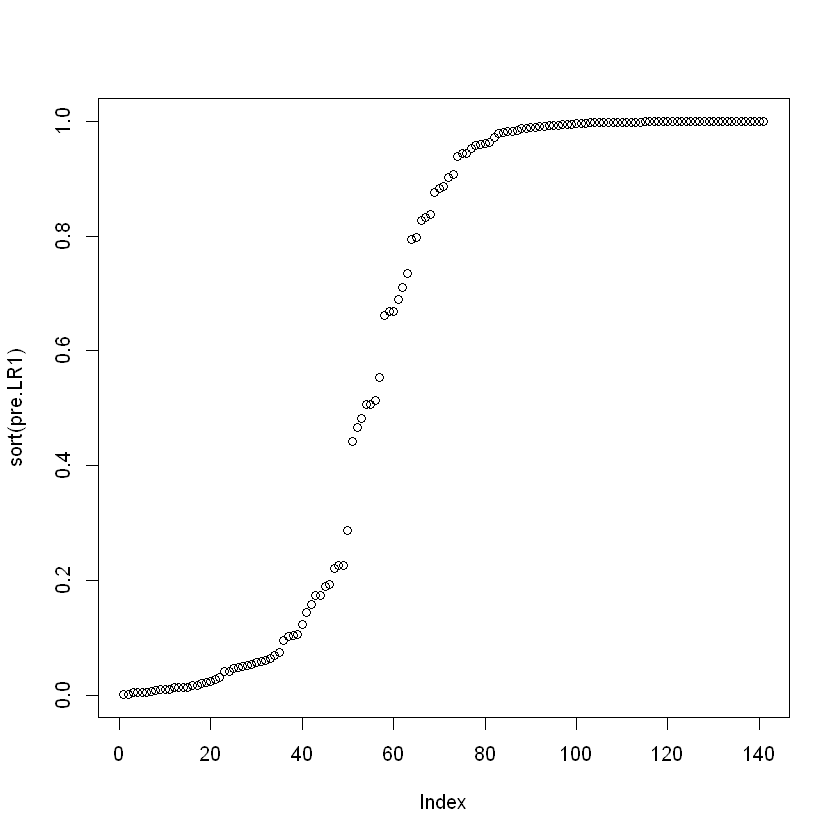

In [7]:
pre.LR1 <- predict.glm(LR1, type="response", newdata=gender_size)
result1 <- ifelse(pre.LR1>0.5, "male", "female")

table(result1, gender_size[,4], dnn=c("Prediction","Actual"))
cat("Accuracy:", sum(gender_size[,4]==result1)/ nrow(gender_size)*100, "% \n")
plot(sort(pre.LR1)) # 屬於logistic迴歸模型的S曲線

In [8]:
#觀看移除其他兩項參數的影響 (準確率會下降)
# remove height
LR2 <- glm(Gender ~ Weight+Waist, data=gender_size, family=binomial(link="logit"))
pre.LR2 <- predict.glm(LR2, type="response", newdata=gender_size)
without_height <- ifelse(pre.LR2>0.5, "male", "female")
table(without_height, gender_size[,4], dnn=c("Prediction","Actual"))
cat("Accuracy:", sum(gender_size[,4]==without_height)/ nrow(gender_size)*100, "% \n")

#remove weight
LR3 <- glm(Gender~ Height+Waist, data=gender_size, family=binomial(link="logit"))
pre.LR3 <- predict.glm(LR3, type="response", newdata=gender_size)
without_weight <- ifelse(pre.LR3>0.5, "male", "female")
table(without_weight, gender_size[,4], dnn=c("Prediction","Actual"))
cat("Accuracy:", sum(gender_size[,4]==without_weight)/ nrow(gender_size)*100, "% \n")

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


          Actual
Prediction female male
    female     49    4
    male        5   83

Accuracy: 93.61702 % 


Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


          Actual
Prediction female male
    female     51    3
    male        3   84

Accuracy: 95.74468 % 


In [9]:
# Probit distribution (similar to cumulative density function)
PRO <- glm(Gender~Height+Weight+Waist, data = gender_size, family = quasibinomial(link ="probit"))
summary(PRO)


Call:
glm(formula = Gender ~ Height + Weight + Waist, family = quasibinomial(link = "probit"), 
    data = gender_size)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.00120  -0.00168   0.00000   0.00001   1.75799  

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -79.01682    9.51979  -8.300 8.81e-14 ***
Height        0.24324    0.03574   6.806 2.86e-10 ***
Weight       -0.05034    0.02515  -2.002   0.0473 *  
Waist         1.49548    0.20480   7.302 2.10e-11 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for quasibinomial family taken to be 0.1688274)

    Null deviance: 187.672  on 140  degrees of freedom
Residual deviance:  23.409  on 137  degrees of freedom
AIC: NA

Number of Fisher Scoring iterations: 11


          Actual
Prediction female male
    female     51    4
    male        3   83

Accuracy: 95.03546 % 


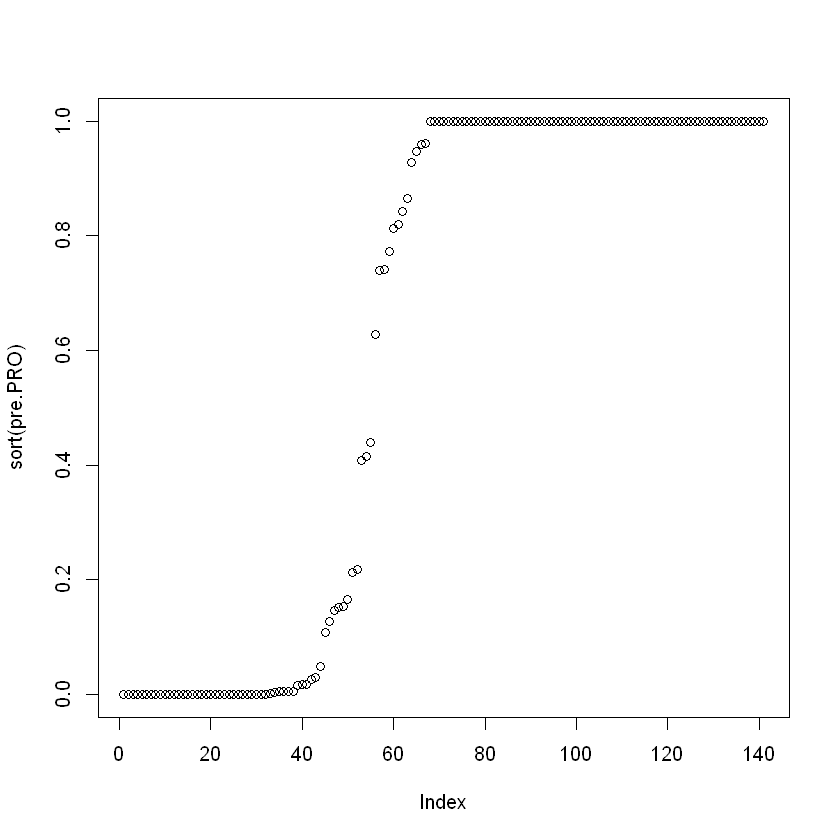

In [10]:
pre.PRO <- predict.glm(PRO, type="response", newdata= gender_size)
result.PRO<-ifelse (pre.PRO>0.5, "male", "female")
table(result.PRO, gender_size[, 4], dnn=c("Prediction","Actual"))
plot(sort(pre.PRO))
cat("Accuracy:", sum(gender_size$Gender==result.PRO)/ nrow(gender_size)*100, "% \n")

# Logistic 回歸模型 (鐵達尼號資料集)

In [11]:
titanic_data <-read.csv("../data_files/titanic.csv", header=T, sep=",",stringsAsFactors = TRUE)

# 整理數據
titanic <- na.exclude(titanic_data) #remove missing values
rw <- c(which(titanic$age==9999), which(titanic$fare==9999))
#identify the id which has missing values in age or fare
titan <- titanic[-rw, 2:5]
titan$survival <- titanic[-rw, 10] #set survival

titan[which(titan[,1]==0), 1]<-"male"  #rename 0 by male
titan[which(titan[,1]==1), 1]<-"female"  #rename 1 by female
titan[,1] <- as.factor(titan$gender)

titan[which(titan[,5]==1), 5]<-"yes"
titan[which(titan[,5]==0), 5]<-"no"
titan[,5]<-as.factor(titan[,"survival"])

titan$class <- as.factor(as.integer(titan$class))

In [12]:
index <- sample(1: nrow(titan), round(0.7*nrow(titan)) ) 
training <- titan[index,]
testing <- titan[-index,]

LR <- glm(formula=survival ~ ., data=training, family=binomial(link="logit"), na.action=na.exclude)
summary(LR)


Call:
glm(formula = survival ~ ., family = binomial(link = "logit"), 
    data = training, na.action = na.exclude)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.2365  -0.6927  -0.4717   0.7566   2.3881  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  4.019200   0.422021   9.524  < 2e-16 ***
gendermale  -2.250598   0.177289 -12.695  < 2e-16 ***
age         -0.042796   0.007110  -6.019 1.75e-09 ***
class2      -1.762299   0.287500  -6.130 8.80e-10 ***
class3      -2.618438   0.287178  -9.118  < 2e-16 ***
fare        -0.002033   0.002086  -0.975     0.33    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1201.86  on 898  degrees of freedom
Residual deviance:  876.14  on 893  degrees of freedom
AIC: 888.14

Number of Fisher Scoring iterations: 4


          Actual
Prediction  no yes
       no  194  36
       yes  56 100

Accuracy: 76.1658 % 


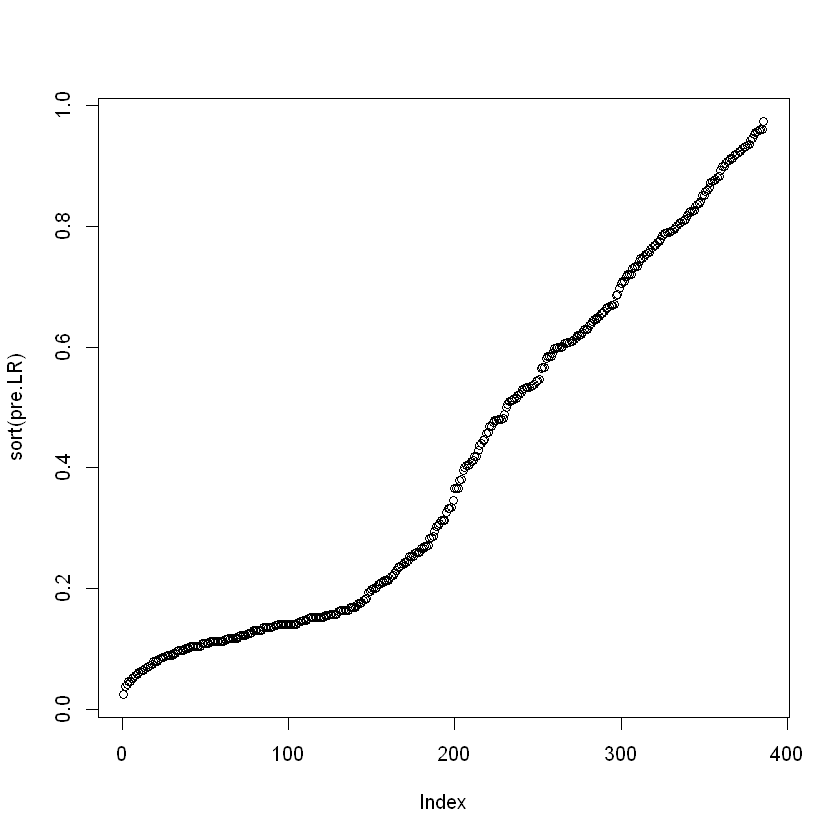

In [13]:
# 預測結果
pre.LR= predict.glm(LR, type="response", newdata=testing)
result<-ifelse (round(pre.LR)>=0.5, "yes", "no")
table(result, testing$survival, dnn=c("Prediction","Actual"))
cat("Accuracy:", sum(testing$survival==result)/ nrow(testing)*100, "% \n")
plot(sort(pre.LR))

In [14]:
# 測試預測各種資料
predict.glm(LR, type="response", newdata=data.frame(fare=30, age=1, class="2", gender="male"))
predict.glm(LR, type="response", newdata=data.frame(fare=30, age=40, class="2", gender="male"))
predict.glm(LR, type="response", newdata=data.frame(fare=50, age=30, class="3", gender="female"))
predict.glm(LR, type="response", newdata=data.frame(fare=50, age=30, class="1", gender="female"))

1 
0.4756488

1 
0.1459732

1 
0.5038057

1 
0.9329968

In [15]:
classtab <- table(titan$class, titan$survival)
prop.table(classtab, 1)
gendertab <- table(titan$gender, titan$survival)
prop.table(gendertab, 1)

   
           no       yes
  1 0.3546326 0.6453674
  2 0.5867159 0.4132841
  3 0.7546362 0.2453638

        
                no       yes
  female 0.3115468 0.6884532
  male   0.7941889 0.2058111

# 多元logistic迴歸 (Iris 資料集)

In [16]:
library(nnet)

In [17]:
data(iris)

# 切割資料集
index <- c(sample(1:50,35), sample(51:100,35), sample(101:150,35)) # 取七成作為訓練集
training <- iris[index,]
testing <- iris[-index,]

In [18]:
# 建立模型
LR.iris <- multinom(Species~., data=training, Hess=TRUE)
summary(LR.iris)
print(confint(LR.iris))

# weights:  18 (10 variable)
initial  value 115.354290 
iter  10 value 11.890357
iter  20 value 4.894333
iter  30 value 4.706763
iter  40 value 4.526143
iter  50 value 4.113175
iter  60 value 4.068841
iter  70 value 3.890040
iter  80 value 3.869457
iter  90 value 3.830437
iter 100 value 3.823064
final  value 3.823064 
stopped after 100 iterations


Call:
multinom(formula = Species ~ ., data = training, Hess = TRUE)

Coefficients:
           (Intercept) Sepal.Length Sepal.Width Petal.Length Petal.Width
versicolor    55.45408    -8.910431   -15.20217     15.16626   -4.481475
virginica    -63.00951    -2.074723   -22.26441     26.08266   21.560843

Std. Errors:
           (Intercept) Sepal.Length Sepal.Width Petal.Length Petal.Width
versicolor     71.4230     183.2751    222.8409     63.93699    141.9656
virginica      78.2804     183.2821    223.1647     65.09879    142.3995

Residual Deviance: 7.646128 
AIC: 27.64613 

, , versicolor

                  2.5 %   97.5 %
(Intercept)   -84.53242 195.4406
Sepal.Length -368.12300 350.3021
Sepal.Width  -451.96238 421.5580
Petal.Length -110.14794 140.4805
Petal.Width  -282.72900 273.7661

, , virginica

                 2.5 %    97.5 %
(Intercept)  -216.4363  90.41725
Sepal.Length -361.3011 357.15168
Sepal.Width  -459.6591 415.13029
Petal.Length -101.5086 153.67394
Petal.Width  -257.5370 300.65867



In [19]:
train.pred=predict(LR.iris, training[, -5])
table(train.pred, training[, 5], dnn=c("Prediction","Actual"))
cat("Training Data Accuracy:", sum(train.pred == training[, 5])/ nrow(training)*100, "% \n")

test.pred=predict(LR.iris, testing[,-5])
table(test.pred, testing[, 5], dnn=c("Prediction","Actual"))
cat("Testing Data Accuracy:", sum(test.pred == testing[, 5])/ nrow(testing)*100, "% \n")

            Actual
Prediction   setosa versicolor virginica
  setosa         35          0         0
  versicolor      0         34         1
  virginica       0          1        34

Training Data Accuracy: 98.09524 % 


            Actual
Prediction   setosa versicolor virginica
  setosa         15          0         0
  versicolor      0         14         1
  virginica       0          1        14

Testing Data Accuracy: 95.55556 % 


In [20]:
# 取資料做預測
x.120 <- as.numeric(c(1, iris[120, -5]))

# versicolor vs. setosa
beta.versicolor <- as.numeric(coef(LR.iris)[1,])
ver <- exp(x.120 %*% beta.versicolor)  
# virginca vs. setosa
beta.virginca <- as.numeric(coef(LR.iris)[2,])
vir <- exp(x.120 %*% beta.virginca)  

# 相對概率
pb.setosa <- 1/(1+ver+vir) 
pb.versicolor <- ver/(1+ver+vir)
pb.virginca <- vir/(1+ver+vir)

cat("Pobability:\n",
    "Setosa: ", pb.setosa*100, "% \n",
    "Versicolor: ", pb.versicolor*100, "% \n",
    "Virginca: ", pb.virginca*100, "% \n")

Pobability:
 Setosa:  1.50987e-15 % 
 Versicolor:  34.09215 % 
 Virginca:  65.90785 % 


# 其他型式的回歸 (波士頓房價資料集)

In [21]:
library(ISLR)
library(Matrix)
library(glmnet)

boston = read.csv("../data_files/boston.csv")
boston$CHAS<- as.factor(boston$CHAS)
head(boston)

Loaded glmnet 4.1-3



,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PT,B,LSTAT,MV
,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
6,0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


In [22]:
# MLR
mlr.boston<- lm(MV ~ ., boston)
summary(mlr.boston)


Call:
lm(formula = MV ~ ., data = boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.595  -2.730  -0.518   1.777  26.199 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.646e+01  5.103e+00   7.144 3.28e-12 ***
CRIM        -1.080e-01  3.286e-02  -3.287 0.001087 ** 
ZN           4.642e-02  1.373e-02   3.382 0.000778 ***
INDUS        2.056e-02  6.150e-02   0.334 0.738287    
CHAS1        2.687e+00  8.616e-01   3.118 0.001925 ** 
NOX         -1.777e+01  3.820e+00  -4.651 4.25e-06 ***
RM           3.810e+00  4.179e-01   9.116  < 2e-16 ***
AGE          6.922e-04  1.321e-02   0.052 0.958229    
DIS         -1.476e+00  1.995e-01  -7.398 6.01e-13 ***
RAD          3.060e-01  6.635e-02   4.613 5.07e-06 ***
TAX         -1.233e-02  3.760e-03  -3.280 0.001112 ** 
PT          -9.527e-01  1.308e-01  -7.283 1.31e-12 ***
B            9.312e-03  2.686e-03   3.467 0.000573 ***
LSTAT       -5.248e-01  5.072e-02 -10.347  < 2e-16 ***
---
Signif. codes:  0 '

In [23]:
# Ridge
ridge.boston <- glmnet(data.matrix(boston[,-14]), boston$MV, family="gaussian", alpha=0, lambda=1)
print(ridge.boston)
ridge.boston$beta

pre_boston.ridge <- predict(ridge.boston, data.matrix(boston[,-14]), s=0.01, type="response")


Call:  glmnet(x = data.matrix(boston[, -14]), y = boston$MV, family = "gaussian",      alpha = 0, lambda = 1) 

  Df  %Dev Lambda
1 13 73.06      1


13 x 1 sparse Matrix of class "dgCMatrix"
                 s0
CRIM   -0.083120682
ZN      0.029415416
INDUS  -0.047373028
CHAS    2.925150819
NOX   -10.458539253
RM      4.024631834
AGE    -0.004842028
DIS    -1.006950875
RAD     0.124029301
TAX    -0.004735751
PT     -0.825836574
B       0.008924223
LSTAT  -0.452803477

In [24]:
# Lasso
lasso.boston <- glmnet(data.matrix(boston[,-14]), boston$MV, family="gaussian", alpha=1, lambda=1)
print(lasso.boston)
lasso.boston$beta

pre_boston.lasso <- predict(lasso.boston, data.matrix(boston[,-14]), s=0.01, type="response")


Call:  glmnet(x = data.matrix(boston[, -14]), y = boston$MV, family = "gaussian",      alpha = 1, lambda = 1) 

  Df  %Dev Lambda
1  4 66.28      1


13 x 1 sparse Matrix of class "dgCMatrix"
                s0
CRIM   .          
ZN     .          
INDUS  .          
CHAS   .          
NOX    .          
RM     3.864829495
AGE    .          
DIS    .          
RAD    .          
TAX    .          
PT    -0.621118238
B      0.001980155
LSTAT -0.496764322

In [25]:
# ElasticNet
elastic.boston <- glmnet(data.matrix(boston[,-14]), boston$MV, family="gaussian", alpha=0.5, lambda=1)
print(elastic.boston)
elastic.boston$beta

pre_boston.elastic <- predict(elastic.boston, data.matrix(boston[,-14]), s=0.01, type="response")


Call:  glmnet(x = data.matrix(boston[, -14]), y = boston$MV, family = "gaussian",      alpha = 0.5, lambda = 1) 

  Df  %Dev Lambda
1  9 68.72      1


13 x 1 sparse Matrix of class "dgCMatrix"
                 s0
CRIM  -0.0199812921
ZN     .           
INDUS  .           
CHAS   1.5862329781
NOX   -0.1352259277
RM     4.1773040682
AGE    .           
DIS   -0.0392889037
RAD    .           
TAX   -0.0002832354
PT    -0.7211265539
B      0.0059515323
LSTAT -0.4788120765

In [26]:
# 比較全部(均方根誤差RMSE、平均絕對誤差MAE、平均絕對百分比誤差MAPE)
table = array(0, c(3,4))
rownames(table)<-c("RMSE","MAE","MAPE")
colnames(table)<-c("MLR","Ridge","Lasso","ElasticNet")

# MLR
table[1,1] <-sqrt(mean((boston$MV- mlr.boston$fitted.values)^2))
table[2,1] <-mean(abs(boston$MV- mlr.boston$fitted.values))
table[3,1] <-mean(abs((boston$MV- mlr.boston$fitted.values)/boston$MV))

# Ridge
table[1,2] <-sqrt(mean((boston$MV- pre_boston.ridge)^2))
table[2,2] <-mean(abs(boston$MV- pre_boston.ridge))
table[3,2] <-mean(abs((boston$MV- pre_boston.ridge)/boston$MV))

# Lasso
table[1,3] <-sqrt(mean((boston$MV- pre_boston.lasso)^2))
table[2,3] <-mean(abs(boston$MV- pre_boston.lasso))
table[3,3] <-mean(abs((boston$MV- pre_boston.lasso)/boston$MV))

# ElasticNet
table[1,4] <-sqrt(mean((boston$MV- pre_boston.elastic)^2))
table[2,4] <-mean(abs(boston$MV- pre_boston.elastic))
table[3,4] <-mean(abs((boston$MV- pre_boston.elastic)/boston$MV))

table 

,MLR,Ridge,Lasso,ElasticNet
RMSE,4.679191,4.7689611,5.3353318,5.138831
MAE,3.270863,3.2424763,3.7062283,3.537802
MAPE,0.164173,0.1617799,0.1890731,0.178655
